In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets.embed import embed_minimal_html
!jupyter nbextension enable --py --sys-prefix widgetsnbextension


In [0]:
#Upload kaggle.json here!

!pip install -q kaggle

from google.colab import files
files.upload()

In [0]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset
!unzip ./novel-corona-virus-2019-dataset.zip -d ./

In [0]:
confirmed_world = pd.read_csv("./time_series_covid_19_confirmed.csv")
confirmed_world.name = "confirmed_world"

death_world = pd.read_csv("./time_series_covid_19_deaths.csv")
death_world.name = "Death_world"

recovered_world = pd.read_csv("./time_series_covid_19_recovered.csv")
recovered_world.name ="recovered_world"

confirmed_US = pd.read_csv("./time_series_covid_19_confirmed_US.csv")
confirmed_US.rename(columns={'Long_': 'Long'}, inplace=True)
confirmed_US.name = "confirmed_US"

death_US = pd.read_csv("./time_series_covid_19_deaths_US.csv")
death_US.rename(columns={'Long_': 'Long'}, inplace=True)
death_US.name = "Death_US"

In [0]:
!pip install geopandas

#import shape file from https://www.naturalearthdata.com/
#I used https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/physical/ne_110m_land.zip
#must import .shp and .shx
from google.colab import files
files.upload()

In [0]:
import geopandas

In [0]:
def generate_map(data_frame, column, shape_file):
  #when loading the dataframe you have to zip the lat and long into markov coordenents
  gdf = geopandas.GeoDataFrame(
    data_frame[column], geometry=geopandas.points_from_xy(data_frame['Long'], data_frame['Lat']))
  
  world = geopandas.read_file(shape_file)
  ax = world.plot()
  #plots the data in relation to the numbers found in a specified collumn e.g. the number of deaths
  #would probs be nice to change colors based on relative percentage or something
  gdf.plot(markersize=data_frame[column], ax=ax, color='red')
  
  plt.show()

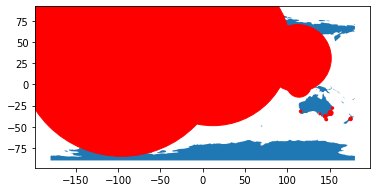

In [31]:
generate_map(death_world, '4/20/20', 'ne_110m_admin_0_countries.shp')

In [0]:
#turns the images into a gif using pillow
def generate_gif(directory_name):
  import pillow as pil
  from os import listdir
  from os.path import isfile, join
  images = [f for f in listdir(directory_name) if isfile(join(directory_name, f))]
  images.save(directory_name + '.gif', save_all=True, append_images=images[1:])  


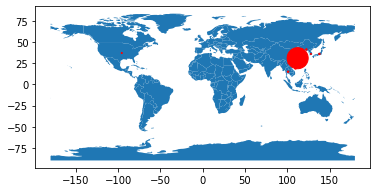

AttributeError: ignored

In [34]:
#This generates images for every day we've been keeping track and makes the gif
#it's broken for now

def day_by_day_map(data_set, shape_file):
  import os
  try:
    os.makedirs("/content/" + data_set.name)
    path = "/content/" + data_set.name
  except:
        path = "/content/" + data_set.name

  dropped = data_set.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])

  for column in dropped.columns: 
    generate_map(data_set, column, shape_file).savefig(path + column + ".png")
  generate_gif(path)

day_by_day_map(confirmed_world, 'ne_110m_admin_0_countries.shp')

In [0]:
#this is where I was going to calc ifr and other relavent stats
#it would be nice to add a simulation as well for hypothetical data points, maybe assign a simularity score to the hypo data so it doesn't throw off the model
def country_ifr(data_set):
  for country in data_set['Country/Region']:
    for date in 
    data_set[date]

In [0]:
#code I found to lay out maps side by side e.g. to contrast deaths vs recovered
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
img_A = mpimg.imread('\path\to\img_A.png')
img_B = mpimg.imread('\path\to\img_B.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[1].imshow(img_B);